In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## dataset

In [12]:
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
N_PIXELS = 28*28
N_CLASSES = 10

In [15]:
x_train = x_train.reshape(-1, N_PIXELS) / 255
x_test  = x_test .reshape(-1, N_PIXELS) / 255

In [16]:
y_train = to_categorical(y_train, N_CLASSES)
y_test  = to_categorical(y_test,  N_CLASSES)

## model

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Lambda, Dropout

In [18]:
np.random.seed(123)

#### MLP + Dropout

[Keras MLP example](https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py): 98.4% test acc in 20 epochs (40s)

In [174]:
model = Sequential([
    Dense(512, activation='relu', input_dim=N_PIXELS),
    Dropout(.2),
    Dense(512, activation='relu'),
    Dropout(.2),
#     Dense(8, activation='relu'),
#     Dropout(.1),
#     Dense(8, activation='relu'),
#     Dropout(.1),
    Dense(N_CLASSES, activation='softmax'),
])

In [175]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#### MLP + Biological Dropout

In [176]:
    Lambda(lambda x: x * np.array([0, 1, 1]))

Setting all of a neuron's weights to zero stops them from being trained (equivalent to cutting out the neuron entirely)

Setting only one of a neuron's connections to zero will still have it be trained (not equivalent to cutting out a single connection).

## train

16, 16 => 95.5% (22s)

16, 16 & .2 => 93.4% (23s)

128, 128 => 98.0% (32s)

128, 128 & .2 => 98.4% (34s)

256, 256 => 97.8% (45s)

256, 256 & .2 => 98.3% (54s)

512, 512 & .2 => 98.1% (93s)

In [177]:
%%time
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                 batch_size=128, epochs=20,
                 verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2491 - acc: 0.9245 - val_loss: 0.1157 - val_acc: 0.9662
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.1014 - acc: 0.9690 - val_loss: 0.0864 - val_acc: 0.9726
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0726 - acc: 0.9774 - val_loss: 0.0746 - val_acc: 0.9782
Epoch 4/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0560 - acc: 0.9816 - val_loss: 0.0686 - val_acc: 0.9784
Epoch 5/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0450 - acc: 0.9853 - val_loss: 0.0608 - val_acc: 0.9819
Epoch 6/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0406 - acc: 0.9863 - val_loss: 0.0591 - val_acc: 0.9852
Epoch 7/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0356 - acc: 0.9884 - val_loss: 0.0669 - val_ac

In [178]:
score = model.evaluate(x_test, y_test, verbose=0)

In [148]:
f'eval loss: {score[0]:.3f}'

'eval loss: 0.109'

In [149]:
f'eval acc: {score[1]:.1%}'

'eval acc: 97.8%'

## viz

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

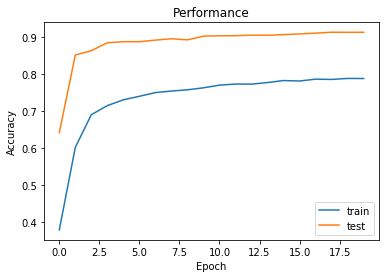

In [132]:
plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='test')

plt.title('Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc=4)
plt.show()

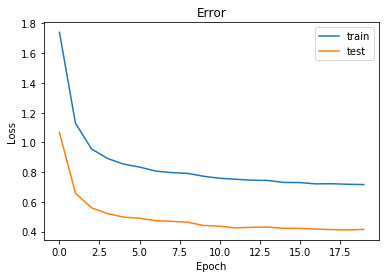

In [133]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')

plt.title('Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
f"final train: {hist.history['acc'][-1]:.1%}"

In [ ]:
f"final test: {hist.history['val_acc'][-1]:.1%}"

In [ ]:
model.get_weights()